In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
import matplotlib.pyplot as pltd
pltd.rcParams["figure.figsize"] = (12,9)

In [8]:
crimedata = pd.read_csv("datap3.csv")
crimedata.drop(['Unnamed: 0.1'], axis = 1)

,Unnamed: 0,ID,Date,Block,IUCR,Description,Location Description,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,severe,Primary Type_ARSON,Primary Type_ASSAULT,Primary Type_BATTERY,Primary Type_BURGLARY,Primary Type_CRIM SEXUAL ASSAULT,Primary Type_CRIMINAL DAMAGE,Primary Type_CRIMINAL TRESPASS,Primary Type_DECEPTIVE PRACTICE,Primary Type_GAMBLING,Primary Type_HOMICIDE,Primary Type_INTERFERENCE WITH PUBLIC OFFICER,Primary Type_INTIMIDATION,Primary Type_KIDNAPPING,Primary Type_LIQUOR LAW VIOLATION,Primary Type_MOTOR VEHICLE THEFT,Primary Type_NARCOTICS,Primary Type_OFFENSE INVOLVING CHILDREN,Primary Type_PROSTITUTION,Primary Type_PUBLIC PEACE VIOLATION,Primary Type_ROBBERY,Primary Type_SEX OFFENSE,Primary Type_STALKING,Primary Type_THEFT,Primary Type_WEAPONS VIOLATION,District_D1.0,District_D10.0,District_D11.0,District_D12.0,District_D14.0,District_D15.0,District_D16.0,District_D17.0,District_D18.0,District_D19.0,District_D2.0,District_D20.0,District_D22.0,District_D24.0,District_D25.0,District_D3.0,District_D4.0,District_D5.0,District_D6.0,District_D7.0,District_D8.0,District_D9.0,District,Primary Type,time_24hour,Date_no_time,Timeblock_0,Timeblock_12,Timeblock_15,Timeblock_18,Timeblock_21,Timeblock_3,Timeblock_6,Timeblock_9,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,closest_station
0,14575,10000947,03/19/2015 12:53:00 PM,021XX W 21ST ST,0560,SIMPLE,SIDEWALK,25.0,31.0,08A,1162361.0,1890051.0,2015,41.853960,-87.679557,"(41.853959553, -87.67955669)",1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,D12.0,ASSAULT,12:53,20150319,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1.317733
1,14577,10003424,03/20/2015 09:30:00 PM,082XX S EBERHART AVE,0820,$500 AND UNDER,STREET,6.0,44.0,06,1181008.0,1850499.0,2015,41.745015,-87.612333,"(41.74501546, -87.612333405)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,D6.0,THEFT,21:30,20150320,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1.517041
2,14578,10003718,03/20/2015 08:00:00 PM,022XX N MAJOR AVE,0560,SIMPLE,ALLEY,37.0,19.0,08A,1138023.0,1914232.0,2015,41.920789,-87.768303,"(41.920789089, -87.768303152)",1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,D25.0,ASSAULT,20:00,20150320,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0.205699
3,14579,10003964,03/21/2015 10:45:00 PM,072XX S ST LAWRENCE AVE,0460,SIMPLE,APARTMENT,6.0,69.0,08B,1181489.0,1857081.0,2015,41.763066,-87.610368,"(41.763066101, -87.61036829999998)",1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,D3.0,BATTERY,22:45,20150321,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0.332558
4,14580,10004272,03/20/2015 11:00:00 PM,028XX W FULLERTON AVE,0560,SIMPLE,GAS STATION,35.0,22.0,08A,1157222.0,1915830.0,2015,41.924805,-87.697718,"(41.92480533, -87.697717952)",1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,D14.0,ASSAULT,23:00,20150320,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0.255971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1779391,2073424,9999992,03/18/2015 04:55:00 PM,057XX S MICHIGAN AVE,041A,AGGRAVATED: HANDGUN,SIDEWALK,20.0,40.0,04B,1178134.0,1867092.0,2015,41.790614,-87.622362,"(41.790614044, -87.62236153299999)",1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,D2.0,BATTERY,16:55,20150318,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.880790
1779392,2073425,9999996,03/17/2015 11:15:00 PM,011XX E 46TH ST,031A,ARMED: HANDGUN,APARTMENT,4.0,39.0,03,1184597.0,1874738.0,2015,41.811446,-87.598424,"(41.811446151999995, -87.598423885)",1,0,0,0,0,0,0,0,0,0,0,0

In [9]:
crimedata.head(5)

,Unnamed: 0,Unnamed: 0.1,ID,Date,Block,IUCR,Description,Location Description,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,severe,Primary Type_ARSON,Primary Type_ASSAULT,Primary Type_BATTERY,Primary Type_BURGLARY,Primary Type_CRIM SEXUAL ASSAULT,Primary Type_CRIMINAL DAMAGE,Primary Type_CRIMINAL TRESPASS,Primary Type_DECEPTIVE PRACTICE,Primary Type_GAMBLING,Primary Type_HOMICIDE,Primary Type_INTERFERENCE WITH PUBLIC OFFICER,Primary Type_INTIMIDATION,Primary Type_KIDNAPPING,Primary Type_LIQUOR LAW VIOLATION,Primary Type_MOTOR VEHICLE THEFT,Primary Type_NARCOTICS,Primary Type_OFFENSE INVOLVING CHILDREN,Primary Type_PROSTITUTION,Primary Type_PUBLIC PEACE VIOLATION,Primary Type_ROBBERY,Primary Type_SEX OFFENSE,Primary Type_STALKING,Primary Type_THEFT,Primary Type_WEAPONS VIOLATION,District_D1.0,District_D10.0,District_D11.0,District_D12.0,District_D14.0,District_D15.0,District_D16.0,District_D17.0,District_D18.0,District_D19.0,District_D2.0,District_D20.0,District_D22.0,District_D24.0,District_D25.0,District_D3.0,District_D4.0,District_D5.0,District_D6.0,District_D7.0,District_D8.0,District_D9.0,District,Primary Type,time_24hour,Date_no_time,Timeblock_0,Timeblock_12,Timeblock_15,Timeblock_18,Timeblock_21,Timeblock_3,Timeblock_6,Timeblock_9,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,closest_station
0,14575,64269,10000947,03/19/2015 12:53:00 PM,021XX W 21ST ST,0560,SIMPLE,SIDEWALK,25.0,31.0,08A,1162361.0,1890051.0,2015,41.853960,-87.679557,"(41.853959553, -87.67955669)",1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,D12.0,ASSAULT,12:53,20150319,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1.317733
1,14577,64271,10003424,03/20/2015 09:30:00 PM,082XX S EBERHART AVE,0820,$500 AND UNDER,STREET,6.0,44.0,06,1181008.0,1850499.0,2015,41.745015,-87.612333,"(41.74501546, -87.612333405)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,D6.0,THEFT,21:30,20150320,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1.517041
2,14578,64272,10003718,03/20/2015 08:00:00 PM,022XX N MAJOR AVE,0560,SIMPLE,ALLEY,37.0,19.0,08A,1138023.0,1914232.0,2015,41.920789,-87.768303,"(41.920789089, -87.768303152)",1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,D25.0,ASSAULT,20:00,20150320,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0.205699
3,14579,64273,10003964,03/21/2015 10:45:00 PM,072XX S ST LAWRENCE AVE,0460,SIMPLE,APARTMENT,6.0,69.0,08B,1181489.0,1857081.0,2015,41.763066,-87.610368,"(41.763066101, -87.61036829999998)",1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,D3.0,BATTERY,22:45,20150321,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0.332558
4,14580,64274,10004272,03/20/2015 11:00:00 PM,028XX W FULLERTON AVE,0560,SIMPLE,GAS STATION,35.0,22.0,08A,1157222.0,1915830.0,2015,41.924805,-87.697718,"(41.92480533, -87.697717952)",1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,D14.0,ASSAULT,23:00,20150320,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0.255971


## Plotting crime rates

### Here, we will plot the occurence rates of the following:
1.Crime Type

2.Scene of Crime

3.Time of Crime

4.Day of Crime

5.Month of Crime

6.Average Temperature of Crime

In [11]:
# Occurrence rates of the various types of crime
crimetypegb=crimedata.groupby(["Primary Type"])["Primary Type"].count()/len(crimedata)*100
crimetypegb.sort_values(ascending=False, inplace=True)
print(crimetypegb)

Primary Type
THEFT                               23.472628
BATTERY                             19.667910
CRIMINAL DAMAGE                     11.692788
NARCOTICS                            9.796976
ASSAULT                              6.754427
BURGLARY                             6.564137
MOTOR VEHICLE THEFT                  4.991525
DECEPTIVE PRACTICE                   4.662537
ROBBERY                              4.349453
CRIMINAL TRESPASS                    2.309997
WEAPONS VIOLATION                    1.391708
PUBLIC PEACE VIOLATION               0.917334
OFFENSE INVOLVING CHILDREN           0.809207
PROSTITUTION                         0.567946
CRIM SEXUAL ASSAULT                  0.477241
INTERFERENCE WITH PUBLIC OFFICER     0.440768
SEX OFFENSE                          0.335226
GAMBLING                             0.169777
ARSON                                0.164606
HOMICIDE                             0.148927
LIQUOR LAW VIOLATION                 0.124143
KIDNAPPING           

Text(0, 0.5, 'Occurrence rate (%)')

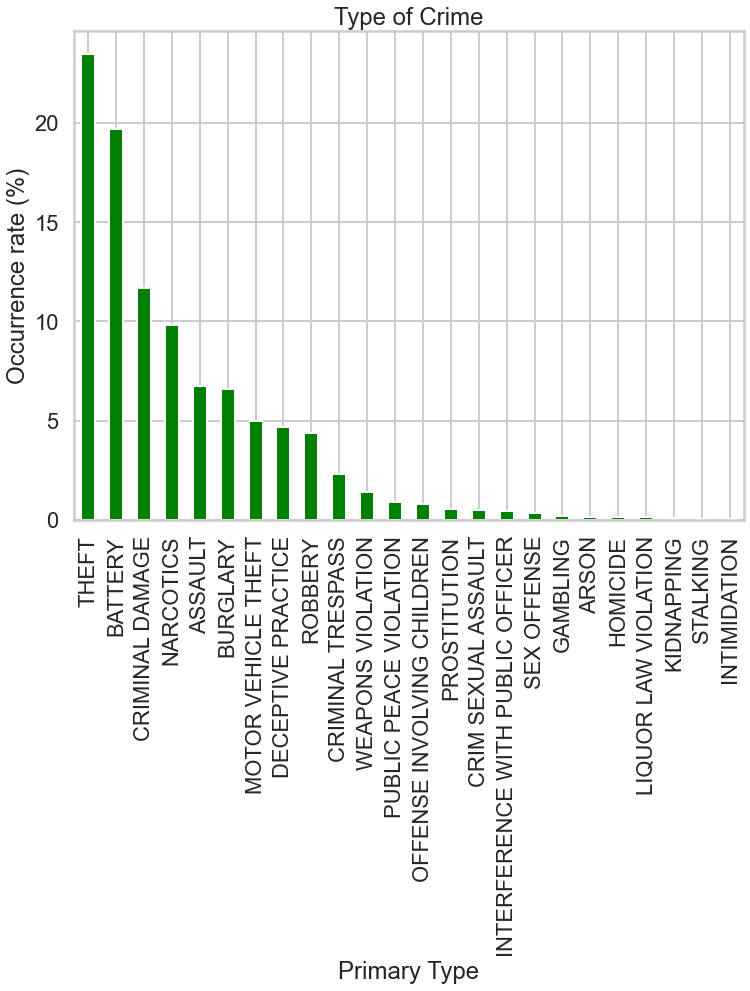

In [44]:
crimetypegb.plot(kind='bar',title="Type of Crime", color='g')
plt.ylabel('Occurrence rate (%)')

In [14]:
locationgb=crimedata.groupby(['Location Description'])["Location Description"].count()/len(crimedata)*100
locationgb.sort_values(ascending=False, inplace=True)
print(locationgb)

Location Description
STREET                            25.352592
RESIDENCE                         15.874263
APARTMENT                         13.385890
SIDEWALK                          12.170759
OTHER                              3.922679
PARKING LOT/GARAGE(NON.RESID.)     3.315507
ALLEY                              2.433635
RESIDENTIAL YARD (FRONT/BACK)      2.350910
SMALL RETAIL STORE                 2.234747
RESIDENCE-GARAGE                   2.073400
RESTAURANT                         2.037545
SCHOOL, PUBLIC, BUILDING           1.966960
RESIDENCE PORCH/HALLWAY            1.966903
VEHICLE NON-COMMERCIAL             1.864397
DEPARTMENT STORE                   1.632239
GROCERY FOOD STORE                 1.267958
GAS STATION                        1.227776
PARK PROPERTY                      0.934924
BAR OR TAVERN                      0.766608
CTA TRAIN                          0.580646
CTA PLATFORM                       0.564686
COMMERCIAL / BUSINESS OFFICE       0.560415
CONVENIENCE

Text(0, 0.5, 'Occurrence rate (%)')

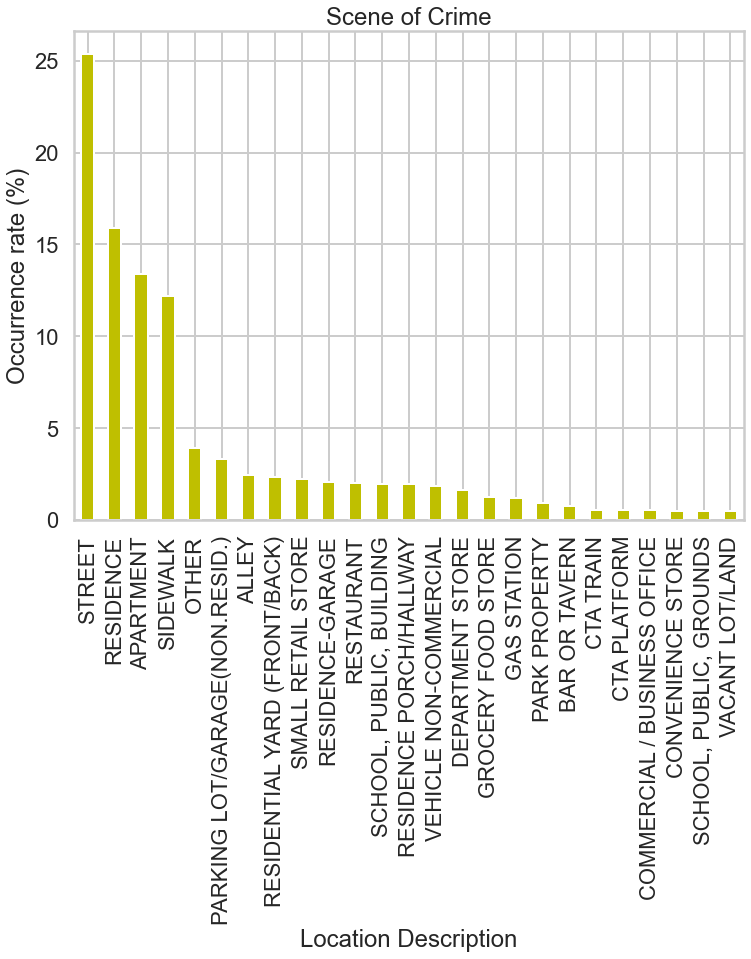

In [45]:
locationgb.plot(kind='bar',title="Scene of Crime",color='y')
plt.ylabel('Occurrence rate (%)')

In [17]:
from datetime import datetime
format = '%m/%d/%Y %I:%M:%S %p'
crimedata["time_hour"]=crimedata.Date.apply(lambda row: datetime.strptime(row, format).strftime("%H"))
crimedata["month"]=crimedata.Date.apply(lambda row: datetime.strptime(row, format).strftime("%m"))

In [20]:
timegb=crimedata.groupby(['time_hour'])["time_hour"].count()/len(crimedata)*100
print(timegb)

time_hour
00    4.953366
01    3.140054
02    2.691812
03    2.209345
04    1.656742
05    1.410141
06    1.641456
07    2.342986
08    3.404807
09    4.374518
10    4.244643
11    4.497594
12    5.637362
13    4.715364
14    5.026425
15    5.423357
16    5.155008
17    5.174059
18    5.668440
19    5.859348
20    5.647422
21    5.369294
22    5.375813
23    4.380644
Name: time_hour, dtype: float64


Text(0, 0.5, 'Occurrence rate (%)')

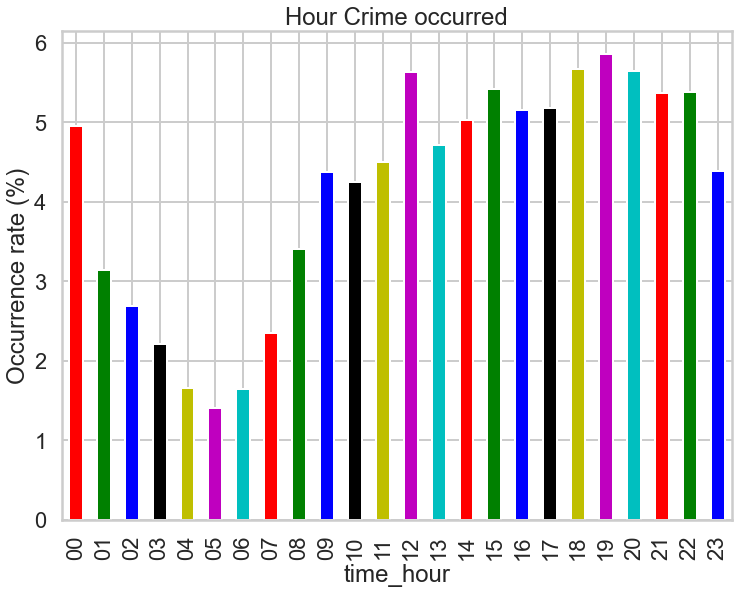

In [22]:
my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']
timegb.plot(kind='bar',title="Hour Crime occurred",color=my_colors)
plt.ylabel('Occurrence rate (%)')

In [23]:
weekday=crimedata[["Weekday_Monday","Weekday_Tuesday","Weekday_Wednesday","Weekday_Thursday","Weekday_Friday","Weekday_Saturday","Weekday_Sunday"]].sum()/len(crimedata)*100
print(weekday)

Weekday_Monday       14.054207
Weekday_Tuesday      14.036280
Weekday_Wednesday    14.163907
Weekday_Thursday     14.069325
Weekday_Friday       14.991379
Weekday_Saturday     14.637158
Weekday_Sunday       14.047744
dtype: float64


Text(0, 0.5, 'Occurrence rate (%)')

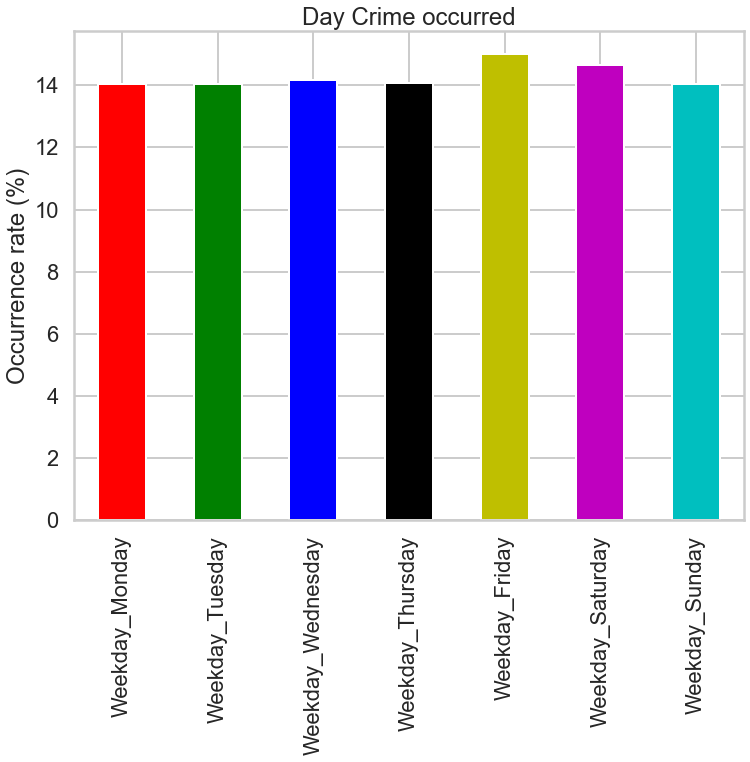

In [28]:
my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']
weekday.plot(kind='bar',title="Day Crime occurred",color=my_colors)
plt.ylabel('Occurrence rate (%)')

In [29]:
month_group=crimedata.groupby(['month'])['month'].count()/len(crimedata)*100
print(month_group)

month
01    7.755553
02    6.676254
03    8.100502
04    8.130399
05    8.959950
06    9.109439
07    9.473271
08    9.298436
09    8.610843
10    8.544416
11    7.776009
12    7.564927
Name: month, dtype: float64


Text(0, 0.5, 'Occurrence rate (%)')

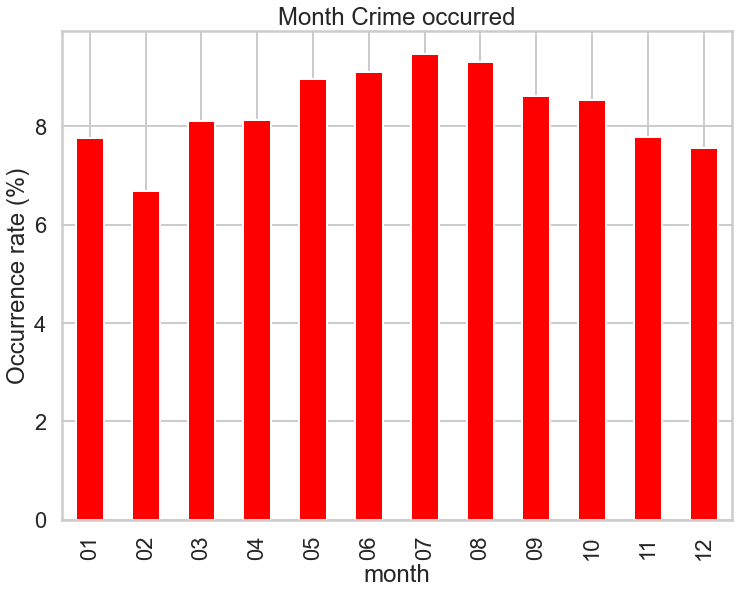

In [31]:
month_group.plot(kind='bar',title="Month Crime occurred",color='r')
plt.ylabel('Occurrence rate (%)')

### Now we focus on only the 4 major types of crimes

In [32]:
def topfour(row):
    keep = ["THEFT", "BATTERY", "NARCOTICS", "CRIMINAL DAMAGE"]
    if row not in keep:
        return "OTHERS"
    else:
        return row

In [34]:
crimedata["New_Type"] = crimedata["Primary Type"].apply(topfour)

In [35]:
# Here we write a function to take in a column name, title, and return a plot that displays the percentage, per column
# with the normalized types of crimes for each feature in the selected column
def plotsplit(cnam, title):
    datasplit = crimedata.groupby([cnam, "New_Type"])[cnam].count().unstack()
    # Convert everything to percentage for normalization, so we can compare!
    datasplit= datasplit.apply(lambda c: c / c.sum() * 100, axis=1)
    # Reorder columns
    datasplit = datasplit[['OTHERS', 'CRIMINAL DAMAGE', 'NARCOTICS', 'BATTERY', 'THEFT']]
    datasplit.plot(kind = "bar", stacked = True, title = title)
    plt.ylabel('Fraction of Crime Type (%)')
    # Anchoring legend from http://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=3, fancybox=True, shadow=True)
    plt.ylim([0,120])

In [36]:
import matplotlib.pyplot as pltd

pltd.rcParams["figure.figsize"] = (12,9)

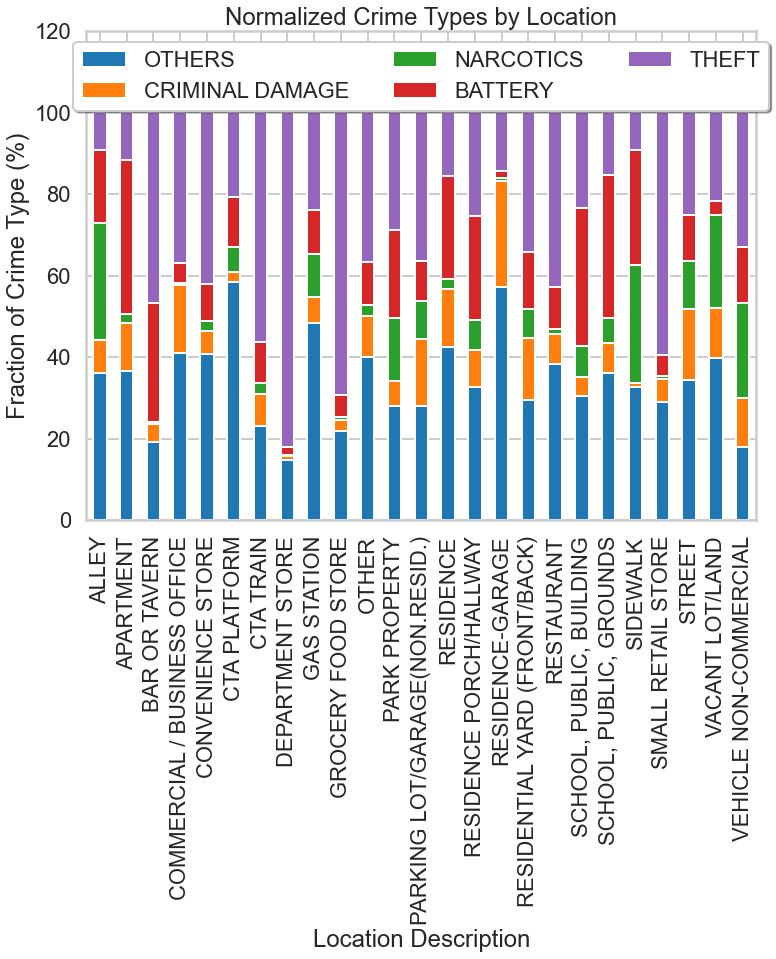

In [37]:
plotsplit("Location Description", "Normalized Crime Types by Location")

#### Crime type per hour of day

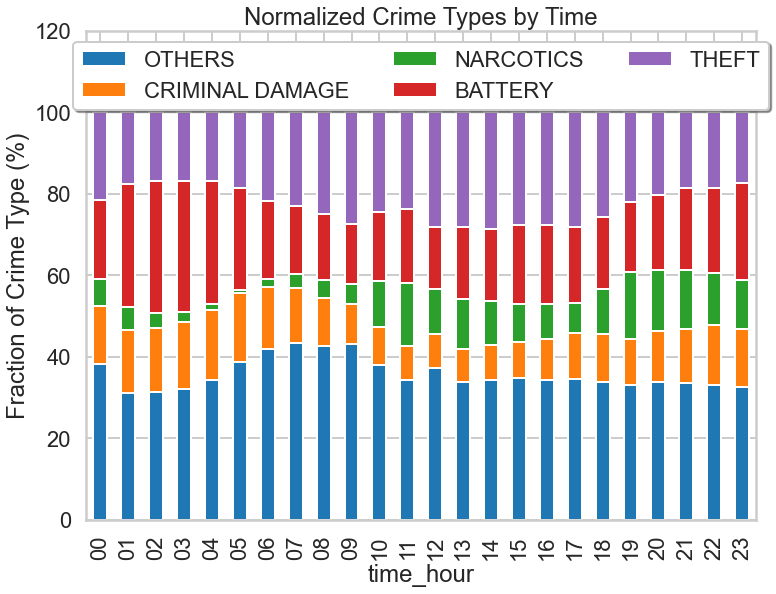

In [38]:
plotsplit("time_hour", "Normalized Crime Types by Time")

#### Crimes by day: First we need to un-get_dummies the data

In [39]:
# Writing a function to turn Mon, Tue, Wed, Thur, Fri, Sat, Sun into 1 - 7
crimedata["Weekday_Tuesday"] = (crimedata["Weekday_Tuesday"].apply(lambda x: x+1 if x > 0 else 0))
crimedata["Weekday_Wednesday"] = (crimedata["Weekday_Wednesday"].apply(lambda x: x+2 if x > 0 else 0))
crimedata["Weekday_Thursday"] = (crimedata["Weekday_Thursday"].apply(lambda x: x+3 if x > 0 else 0))
crimedata["Weekday_Friday"] = (crimedata["Weekday_Friday"].apply(lambda x: x+4 if x > 0 else 0))
crimedata["Weekday_Saturday"] = (crimedata["Weekday_Saturday"].apply(lambda x: x+5 if x > 0 else 0))
crimedata["Weekday_Sunday"] = (crimedata["Weekday_Sunday"].apply(lambda x: x+6 if x > 0 else 0))

In [40]:
crimedata["Num_Day"] = crimedata["Weekday_Monday"] + crimedata["Weekday_Tuesday"] + crimedata["Weekday_Wednesday"] + crimedata["Weekday_Thursday"] + crimedata["Weekday_Friday"] + crimedata["Weekday_Saturday"] + crimedata["Weekday_Sunday"]
crimedata["Num_Day"] = crimedata["Num_Day"].astype(int)

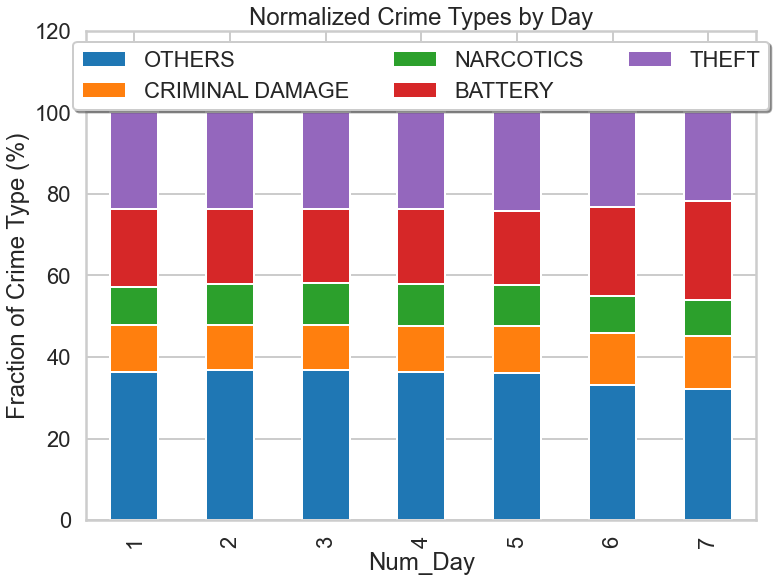

In [41]:
plotsplit("Num_Day", "Normalized Crime Types by Day")

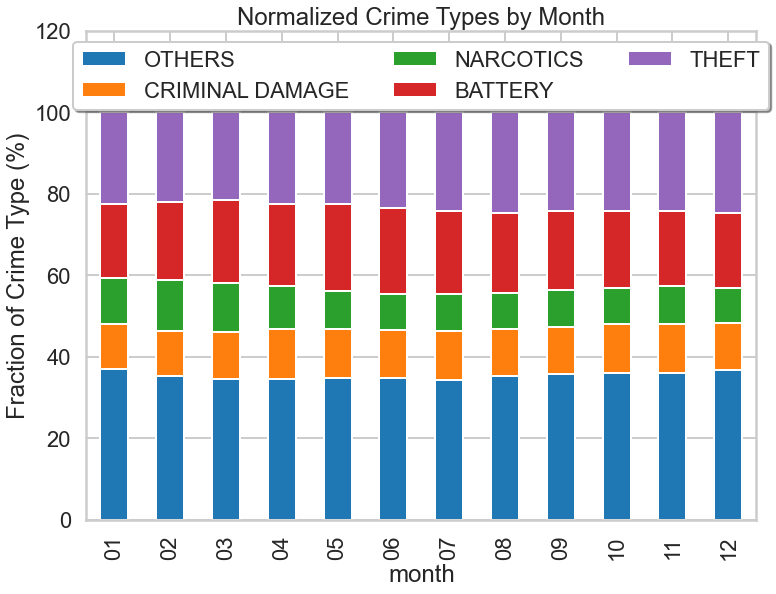

In [43]:
plotsplit("month", "Normalized Crime Types by Month")